In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple


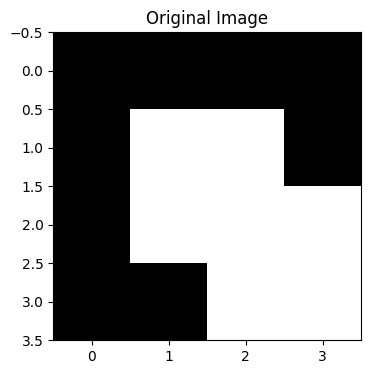

In [2]:
# Create an 8x8 pixel image with random values
# image = np.random.randint(0,2, size=(8, 8)) 
# image=image.astype(np.uint8)
image = np.array([[0, 0, 0, 0],
                    [0, 1, 1, 0],
                    [0, 1, 1, 1],
                    [0, 0, 1, 1]])
# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

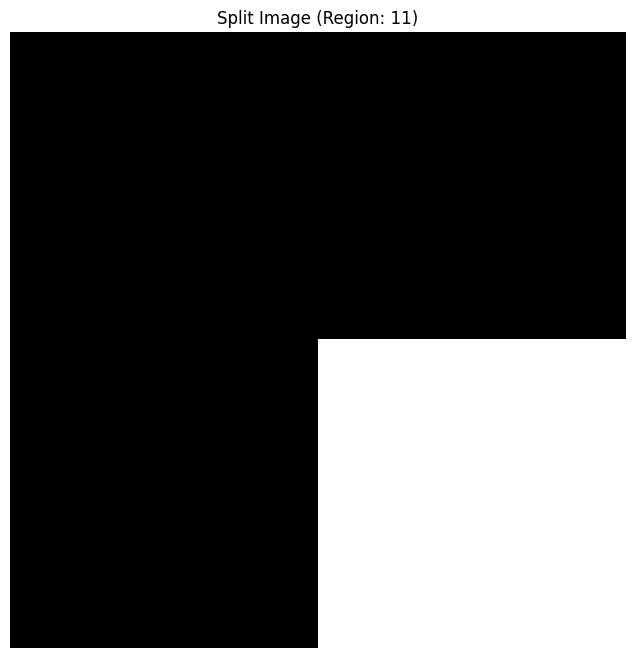

Regions (Region: 11):
{('111',): 0, ('112',): 0, ('113',): 0, ('114',): 1}


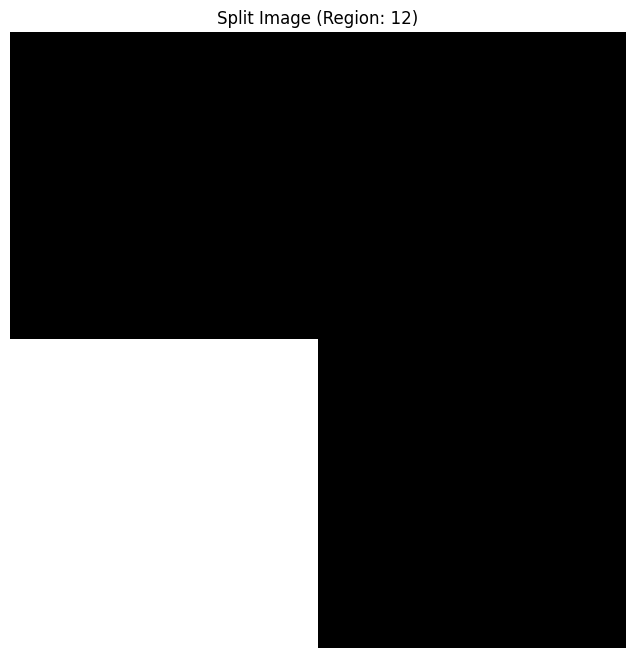

Regions (Region: 12):
{('121',): 0, ('122',): 0, ('123',): 1, ('124',): 0}


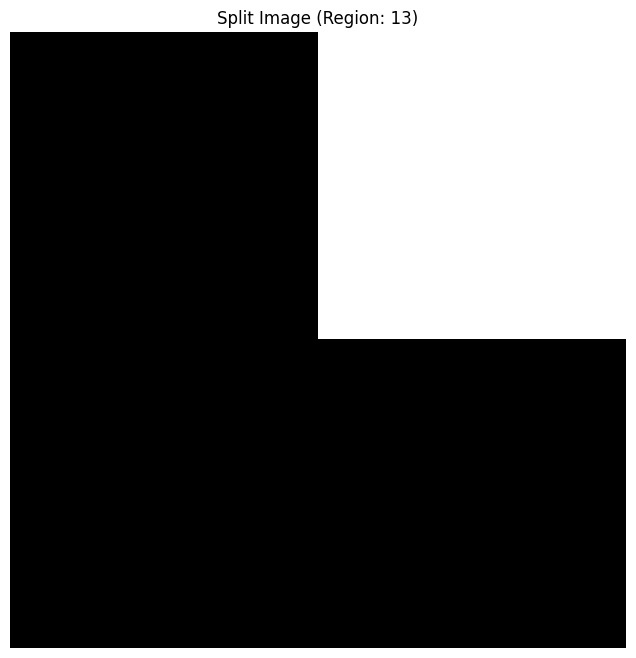

Regions (Region: 13):
{('131',): 0, ('132',): 1, ('133',): 0, ('134',): 0}


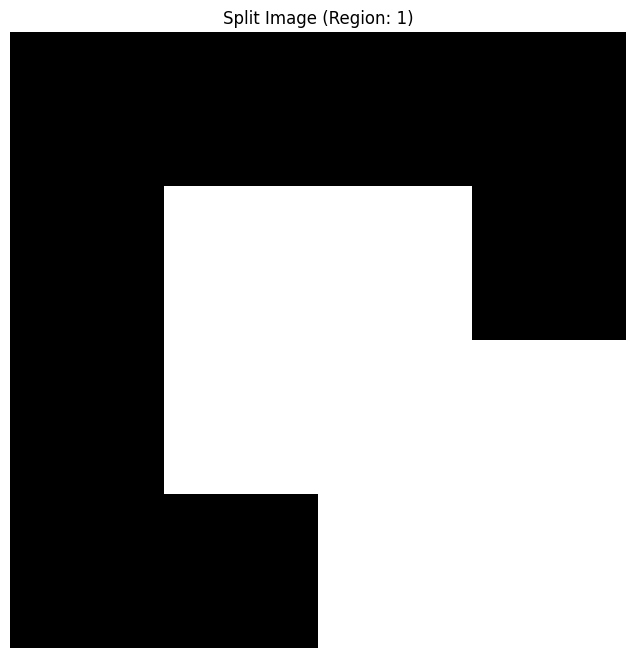

Regions (Region: 1):
{('111',): 0, ('112',): 0, ('113',): 0, ('114',): 1, ('121',): 0, ('122',): 0, ('123',): 1, ('124',): 0, ('131',): 0, ('132',): 1, ('133',): 0, ('134',): 0, ('14',): 1}
{('111',): 0, ('112',): 0, ('113',): 0, ('114',): 1, ('121',): 0, ('122',): 0, ('123',): 1, ('124',): 0, ('131',): 0, ('132',): 1, ('133',): 0, ('134',): 0, ('14',): 1}


In [3]:

def is_homogeneous(region):
    # Check if all pixels in the region have the same color (0 or 1)
    return np.all(region == 0) or np.all(region == 1)

def split(image, region='1'):
    # Check if the image is homogeneous (base case)
    if is_homogeneous(image):
        return {(region,): image[0, 0]}
    
    # Splitting the image into top and bottom halves
    h, w = image.shape
    mid_h, mid_w = h // 2, w // 2
    
    # Top-left quadrant
    top_left = image[:mid_h, :mid_w]
    if is_homogeneous(top_left):
        top_left_regions = {(f'{region}1',): top_left[0, 0]}
    else:
        top_left_regions = split(top_left, f'{region}1')
    
    # Top-right quadrant
    top_right = image[:mid_h, mid_w:]
    if is_homogeneous(top_right):
        top_right_regions = {(f'{region}2',): top_right[0, 0]}
    else:
        top_right_regions = split(top_right, f'{region}2')
    
    # Bottom-left quadrant
    bottom_left = image[mid_h:, :mid_w]
    if is_homogeneous(bottom_left):
        bottom_left_regions = {(f'{region}3',): bottom_left[0, 0]}
    else:
        bottom_left_regions = split(bottom_left, f'{region}3')
    
    # Bottom-right quadrant
    bottom_right = image[mid_h:, mid_w:]
    if is_homogeneous(bottom_right):
        bottom_right_regions = {(f'{region}4',): bottom_right[0, 0]}
    else:
        bottom_right_regions = split(bottom_right, f'{region}4')
    
    # Merge the regions
    regions = {}
    regions.update(top_left_regions)
    regions.update(top_right_regions)
    regions.update(bottom_left_regions)
    regions.update(bottom_right_regions)
    
    # Display the split image and associated regions
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    plt.title(f'Split Image (Region: {region})')
    plt.axis('off')
    plt.show()
    print(f'Regions (Region: {region}):')
    print(regions)
    
    return regions

# Split the image recursively
regions = split(image)
print(regions)

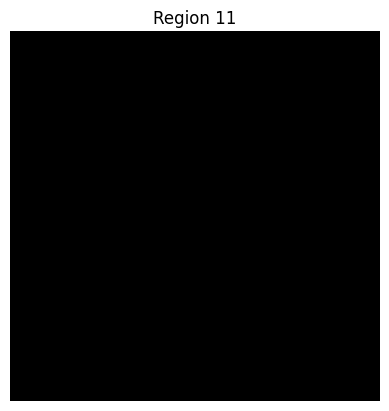

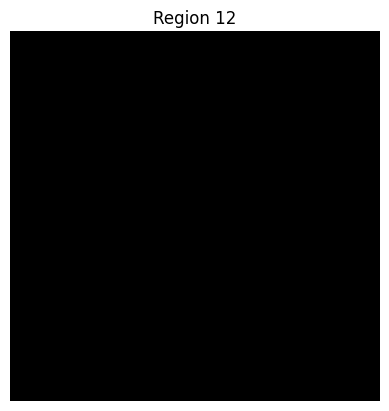

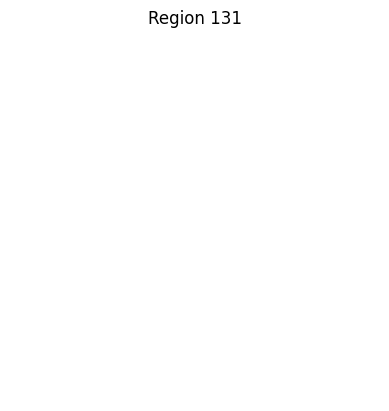

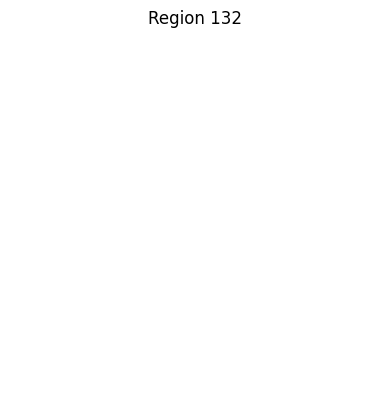

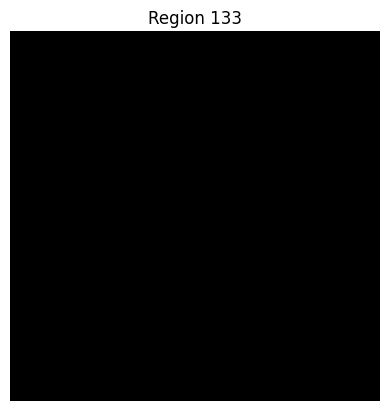

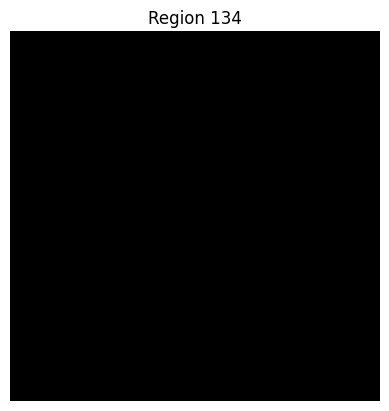

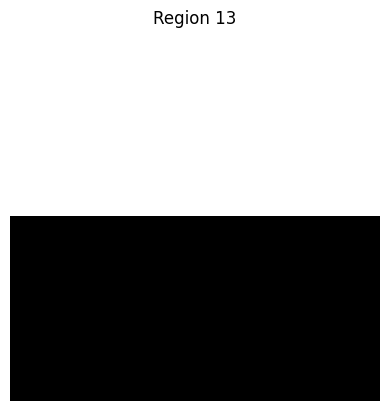

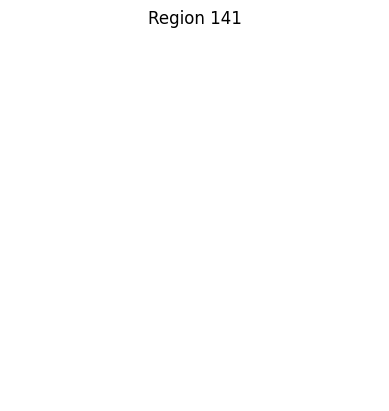

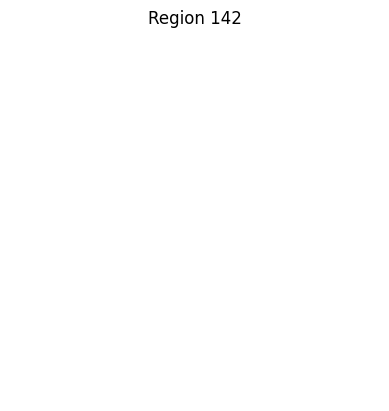

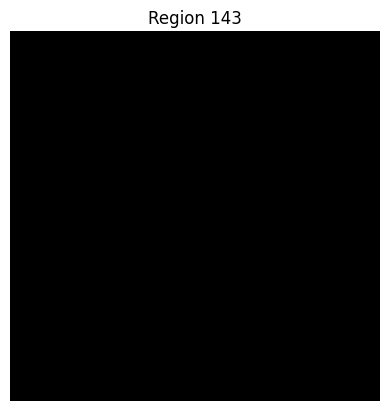

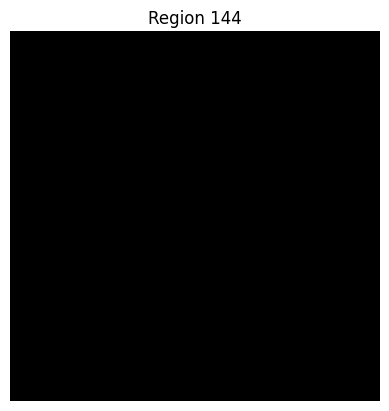

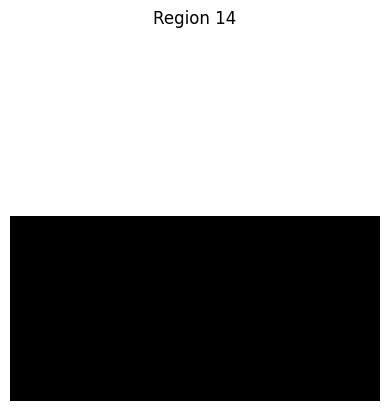

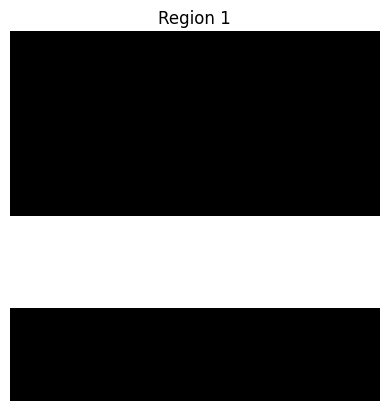

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class QuadTreeNode:
    def __init__(self, value):
        self.value = value
        self.children = {}

def is_homogeneous(region):
    # Check if all pixels in the region have the same color (0 or 1)
    return np.all(region == 0) or np.all(region == 1)

def split(image, region='1', plot=True):
    # Check if the image is homogeneous (base case)
    if is_homogeneous(image):
        if plot:
            plt.imshow(image, cmap='gray', vmin=0, vmax=1)
            plt.title(f'Region {region}')
            plt.axis('off')
            plt.show()
        return QuadTreeNode(image[0, 0])
    
    # Splitting the image into top and bottom halves
    h, w = image.shape
    mid_h, mid_w = h // 2, w // 2
    
    # Create a new QuadTreeNode for the current region
    node = QuadTreeNode(None)
    
    # Top-left quadrant
    top_left = image[:mid_h, :mid_w]
    node.children[f'{region}1'] = split(top_left, f'{region}1', plot)
    
    # Top-right quadrant
    top_right = image[:mid_h, mid_w:]
    node.children[f'{region}2'] = split(top_right, f'{region}2', plot)
    
    # Bottom-left quadrant
    bottom_left = image[mid_h:, :mid_w]
    node.children[f'{region}3'] = split(bottom_left, f'{region}3', plot)
    
    # Bottom-right quadrant
    bottom_right = image[mid_h:, mid_w:]
    node.children[f'{region}4'] = split(bottom_right, f'{region}4', plot)
    
    if plot:
        plt.imshow(image, cmap='gray', vmin=0, vmax=1)
        plt.title(f'Region {region}')
        plt.axis('off')
        plt.show()
    
    return node

# Example usage:
image = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [0, 0, 0, 0]
])

# Split the image recursively to build the quadtree
quadtree_root = split(image)
